In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


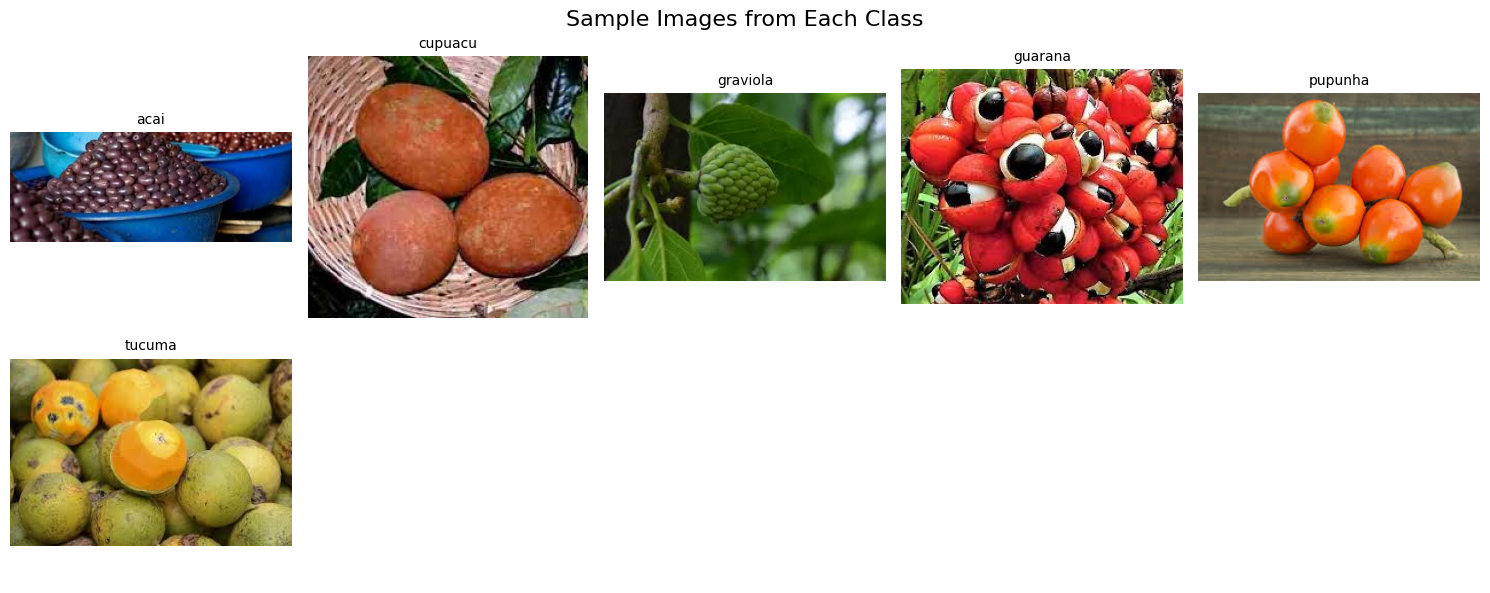

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define dataset path
train_dir = "/content/drive/MyDrive/AI&ML -level6/Worksheet/FruitinAmazon/FruitinAmazon/train"  # Update path

# Get the class names (subdirectories)
class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

# Check if dataset is empty
if not class_names:
    raise ValueError("No class directories found in the train folder. Check dataset path!")

# Select one random image from each class
selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg'))]

    if image_files:
        random_image = random.choice(image_files)
        selected_images.append(os.path.join(class_path, random_image))
        selected_labels.append(class_name)

# Ensure images were selected
num_classes = len(selected_images)
if num_classes == 0:
    raise ValueError("No images found in any class folder. Please check dataset.")

# Set up grid layout
cols = min(5, num_classes)  # Maximum 5 columns
rows = (num_classes // cols) + (num_classes % cols > 0)  # Ensure at least 1 row

# Plot images
fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
fig.suptitle("Sample Images from Each Class", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i], fontsize=10)
        ax.axis("off")  # Hide axes
    else:
        ax.axis("off")  # Hide empty subplots

plt.tight_layout()
plt.show()


What did you Observe?

Each image represents a unique class, ensuring a structured dataset. Variations in resolution, lighting, and orientation exist, with some class imbalances. Preprocessing like resizing and normalization may be needed for consistency.

In [ ]:
import os
from PIL import Image

# Define dataset path (Update this path as needed)
train_dir = "/content/drive/MyDrive/AI&ML -level6/Worksheet/FruitinAmazon/FruitinAmazon/train"  # Change this to your actual train folder path

# List to store corrupted image paths
corrupted_images = []

# Iterate through class directories
for class_name in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)

    # Ensure it's a directory
    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:
                # Try opening the image
                with Image.open(image_path) as img:
                    img.verify()  # Verify image integrity
            except (IOError, SyntaxError):
                # If the image is corrupted, remove it
                corrupted_images.append(image_path)
                os.remove(image_path)
                print(f"Removed corrupted image: {image_path}")

# Print summary
if not corrupted_images:
    print("No Corrupted Images Found.")


No Corrupted Images Found.


In [ ]:
import tensorflow as tf

# Define image size and batch size
img_height = 128  # Reshaped image height
img_width = 128   # Reshaped image width
batch_size = 32   # Number of samples per batch
validation_split = 0.2  # 80% training, 20% validation

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]

# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',  # Automatically infer labels based on subdirectory names
    label_mode='int',   # Encode labels as integers
    image_size=(img_height, img_width),  # Resize images to target dimensions
    interpolation='nearest',  # Interpolation method for resizing
    batch_size=batch_size,  # Number of images per batch
    shuffle=True,  # Shuffle the training dataset
    validation_split=validation_split,  # Fraction of data for validation
    subset='training',  # Use the training subset
    seed=123  # Seed for reproducibility of data split
)

# Apply the normalization (Rescaling) to the training dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',  # Automatically infer labels based on subdirectory names
    label_mode='int',   # Encode labels as integers
    image_size=(img_height, img_width),  # Resize images to target dimensions
    interpolation='nearest',  # Interpolation method for resizing
    batch_size=batch_size,  # Number of images per batch
    shuffle=False,  # Do not shuffle the validation dataset
    validation_split=validation_split,  # Fraction of data for validation
    subset='validation',  # Use the validation subset
    seed=123  # Seed for reproducibility of data split
)

# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(128, 128, 3)))

# Pooling Layer 1
model.add(layers.MaxPooling2D((2, 2), strides=2))

# Convolutional Layer 2
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))

# Pooling Layer 2
model.add(layers.MaxPooling2D((2, 2), strides=2))

# Flatten Layer
model.add(layers.Flatten())

# Fully Connected Layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

# Output Layer
model.add(layers.Dense(num_classes, activation='softmax'))  # num_classes: number of output classes

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model architecture
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',  # Optimizer: Adam optimizer is a good choice for most problems
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification with integer labels
    metrics=['accuracy']  # Metric: Accuracy is a common metric for classification tasks
)


In [ ]:
import tensorflow as tf

# Define the callbacks for early stopping and saving the best model
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'samir_shrestha.h5',  # Path where the best model will be saved
        monitor='val_loss',  # Metric to monitor for saving the best model
        save_best_only=True,  # Save only the best model
        mode='min',  # Minimizing the validation loss
        verbose=1  # Print when saving the model
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',  # Monitor validation loss for early stopping
        patience=10,  # Number of epochs with no improvement to wait before stopping
        restore_best_weights=True,  # Restore the best weights after stopping
        verbose=1  # Print when stopping early
    )
]

# Train the model
history = model.fit(
    train_ds,  # Training dataset
    validation_data=val_ds,  # Validation dataset
    epochs=250,  # Number of epochs
    batch_size=16,  # Batch size
    callbacks=callbacks  # List of callbacks
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.9803 - loss: 0.1156
Epoch 1: val_loss improved from inf to 0.58182, saving model to samir_shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 579ms/step - accuracy: 0.9783 - loss: 0.1143 - val_accuracy: 0.8333 - val_loss: 0.5818
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 1.0000 - loss: 0.0303
Epoch 2: val_loss improved from 0.58182 to 0.44502, saving model to samir_shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 538ms/step - accuracy: 1.0000 - loss: 0.0300 - val_accuracy: 0.8889 - val_loss: 0.4450
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.9902 - loss: 0.0621
Epoch 3: val_loss improved from 0.44502 to 0.41240, saving model to samir_shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 487ms/step - accuracy: 0.9891 - loss: 0.0629 - val_accuracy: 0.8333 - val_loss: 0.4124
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 1.0000 - loss: 0.0210
Epoch 4: val_loss improved from 0.41240 to 0.28386, saving model to samir_shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 794ms/step - accuracy: 1.0000 - loss: 0.0215 - val_accuracy: 0.8889 - val_loss: 0.2839
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - accuracy: 1.0000 - loss: 0.0207
Epoch 5: val_loss improved from 0.28386 to 0.25307, saving model to samir_shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 816ms/step - accuracy: 1.0000 - loss: 0.0210 - val_accuracy: 0.8333 - val_loss: 0.2531
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 1.0000 - loss: 0.0167
Epoch 6: val_loss did not improve from 0.25307
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 506ms/step - accuracy: 1.0000 - loss: 0.0163 - val_accuracy: 0.8333 - val_loss: 0.3212
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 1.0000 - loss: 0.0045
Epoch 7: val_loss did not improve from 0.25307
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 439ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.8333 - val_loss: 0.4387
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 1.0000 - loss: 0.0029
Epoch 8: val_loss did not improve from 0.25307
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 445ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.8333 - val_loss: 0.5574
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 1.0000 - loss: 0.0040
Epoch 9: val_loss did not improve from 0.25307
3/3 ━━━━━━━━

In [ ]:
# Assuming the test data is stored in 'test_dir'
test_dir = '/content/drive/MyDrive/AI&ML -level6/Worksheet/FruitinAmazon/FruitinAmazon/test'  # Replace with your test data directory path

# Create the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,  # Path to test data
    image_size=(img_height, img_width),  # Resize the images
    batch_size=batch_size,  # Number of samples per batch
    shuffle=False  # No shuffling for evaluation
)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_ds)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step - accuracy: 0.2333 - loss: 13.7573
Test Loss: 13.757328987121582
Test Accuracy: 0.23333333432674408


In [ ]:
# Save the trained model to an .h5 file
model.save('samir_shrestha_model.h5')
print("Model saved successfully!")


Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.20      1.00      0.33         5
           3       0.50      0.40      0.44         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5

    accuracy                           0.23        30
   macro avg       0.12      0.23      0.13        30
weighted avg       0.12      0.23      0.13        30

Epoch 1/250


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.2251 - loss: 1.7774
Epoch 1: val_loss did not improve from 0.25307
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 475ms/step - accuracy: 0.2244 - loss: 1.7796 - val_accuracy: 0.6111 - val_loss: 1.2013
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.2888 - loss: 1.5400
Epoch 2: val_loss did not improve from 0.25307
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 532ms/step - accuracy: 0.2964 - loss: 1.5380 - val_accuracy: 0.8333 - val_loss: 1.1808
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.4439 - loss: 1.3116
Epoch 3: val_loss did not improve from 0.25307
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 564ms/step - accuracy: 0.4510 - loss: 1.3003 - val_accuracy: 0.6111 - val_loss: 1.2306
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 600ms/step - accuracy: 0.5041 - loss: 1.1534
Epoch 4: val_loss did not improve from 0.25307
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 790ms/step - accuracy: 0.5100 - loss: 1.1452 - val_accuracy: 0.8333 - val_loss: 0.8494
Epoch 5/250
3/3 ━━━━━━━━

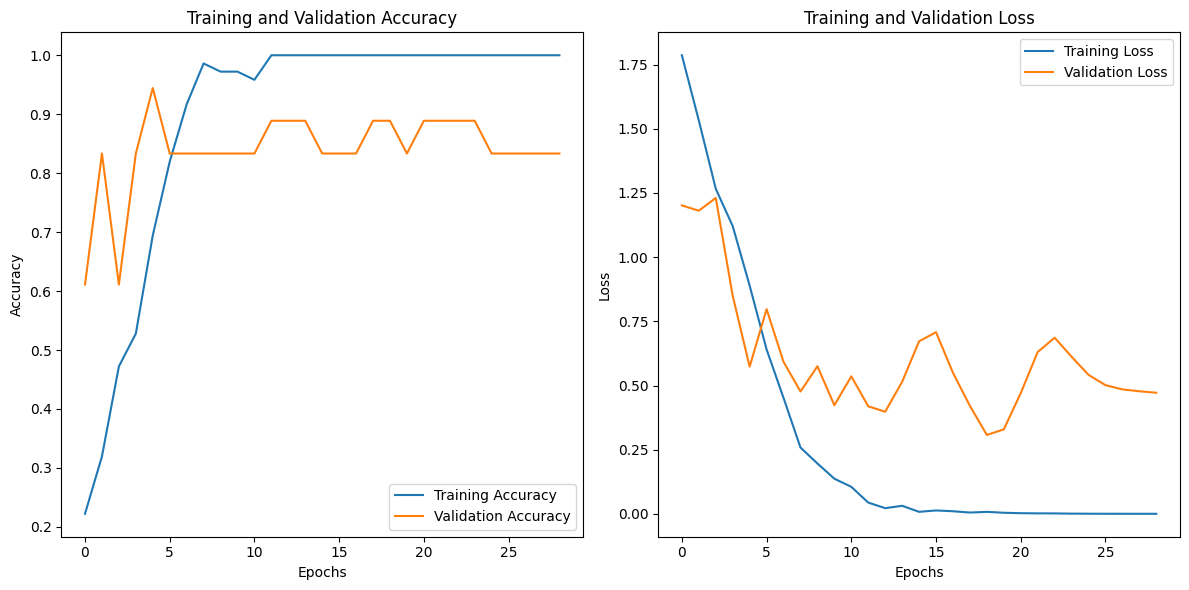

Model saved as 'samir_shrestha_model.h5'


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 1. Make Predictions on Test Data
test_images, test_labels = [], []  # Initialize empty lists to store test images and labels

# Iterate over the test dataset to get images and labels
for images, labels in test_ds:
    test_images.append(images)
    test_labels.append(labels)

# Convert lists to numpy arrays
test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

# Predict on the test dataset
predictions = model.predict(test_images)

# Convert probabilities to class labels using np.argmax
predicted_labels = np.argmax(predictions, axis=1)

# 2. Generate Classification Report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

# 3. Visualization of Training and Validation Loss and Accuracy
history = model.fit(
    train_ds,  # Training dataset
    validation_data=val_ds,  # Validation dataset
    epochs=250,  # Number of epochs
    batch_size=16,  # Batch size
    callbacks=callbacks  # List of callbacks
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# 4. Save the Model
model.save('samir_shrestha_model.h5')  # Save the trained model
print("Model saved as 'samir_shrestha_model.h5'")
